# System Idenfication of the VESC

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('2023-11-12_15-17-10_P=0.0008, 1k-10k.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ms_today                  6747 non-null   int64  
 1   input_voltage             6747 non-null   float64
 2   temp_mos_max              6747 non-null   float64
 3   temp_mos_1                6747 non-null   int64  
 4   temp_mos_2                6747 non-null   int64  
 5   temp_mos_3                6747 non-null   int64  
 6   temp_motor                6747 non-null   float64
 7   current_motor             6747 non-null   float64
 8   current_in                6747 non-null   float64
 9   d_axis_current            6747 non-null   float64
 10  q_axis_current            6747 non-null   float64
 11  erpm                      6747 non-null   int64  
 12  duty_cycle                6747 non-null   float64
 13  amp_hours_used            6747 non-null   float64
 14  amp_hour

In [110]:
data_erpm = data[['ms_today', 'erpm']]
data_erpm.head()

,ms_today,erpm
0,26230302,0
1,26230323,0
2,26230345,0
3,26230366,0
4,26230388,0


In [111]:
f = lambda x:x-data_erpm['ms_today'][0]
data_erpm['ms_today'] = data_erpm['ms_today'].apply(f)
data_erpm.describe()

/tmp/ipykernel_36608/1135711610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_erpm['ms_today'] = data_erpm['ms_today'].apply(f)


,ms_today,erpm
count,6747.000000,6747.000000
mean,72342.940863,1791.036905
std,41799.730649,2492.754161
min,0.000000,-149.000000
25%,36146.500000,0.000000
50%,72303.000000,399.000000
75%,108514.500000,3151.000000
max,144756.000000,8840.000000


In [112]:
data_erpm.head()

,ms_today,erpm
0,0,0
1,21,0
2,43,0
3,64,0
4,86,0


<AxesSubplot:xlabel='ms_today'>

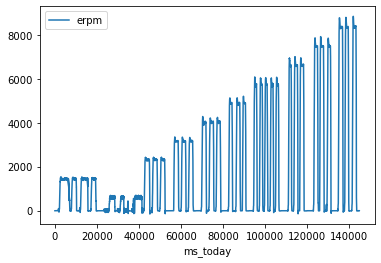

In [113]:
data_erpm.plot('ms_today', 'erpm')

In [123]:
def plot_data(x_lower_bound, x_upper_bound, y_upper_bound):
    fig, ax = plt.subplots(figsize = [16,8])
    ax.plot(data_erpm['ms_today'].to_numpy(), data_erpm['erpm'].to_numpy())
    ax.set_xlabel('Time [ms]')
    ax.set_ylabel('RPM')
    ax.set_xlim(xmin=x_lower_bound,  xmax=x_upper_bound)
    ax.set_ylim(ymin=-500,  ymax=y_upper_bound+500)

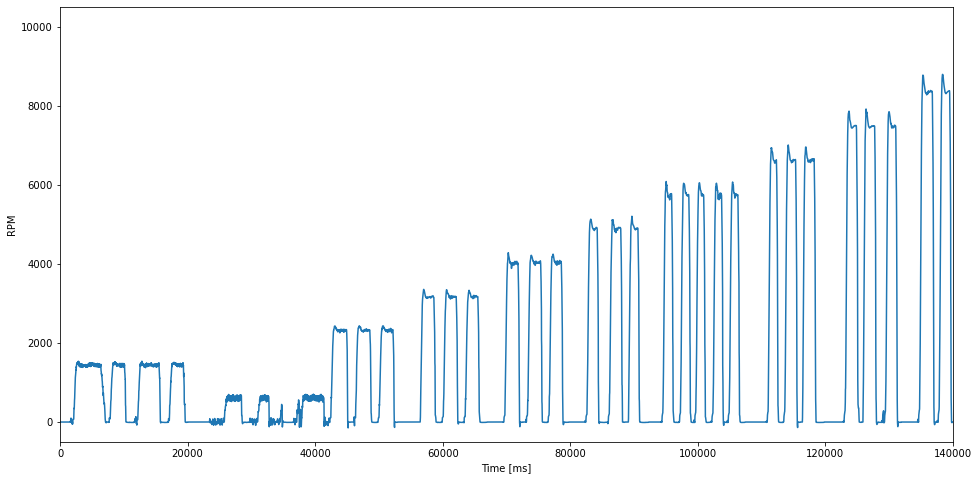

In [161]:
plot_data(0,140000,10000)

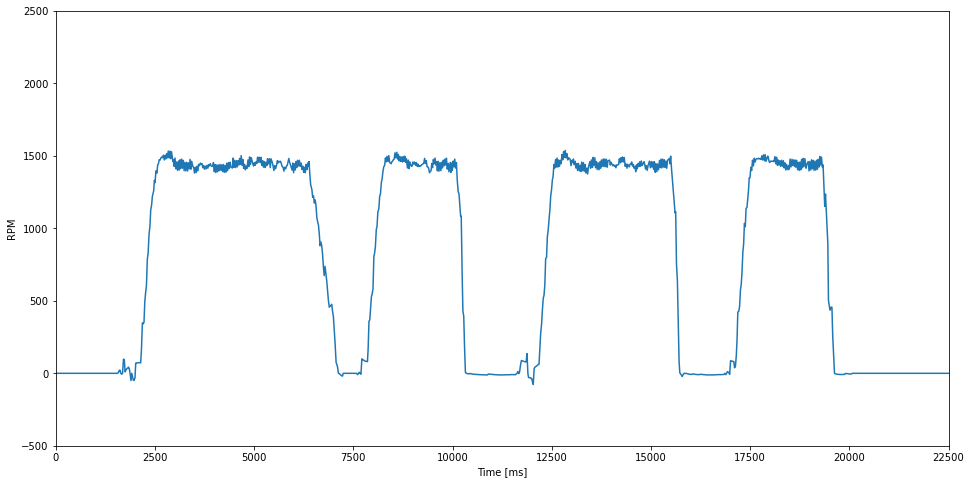

In [131]:
plot_data(x_lower_bound=0,x_upper_bound=22500,y_upper_bound=2000)

In [162]:
def row_subset(df, time_lower_bound, time_upper_bound):
    _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]
    _ = _.reset_index()
    _ = _.drop('index', axis=1)
    _.plot('ms_today', 'erpm')
    return _

/tmp/ipykernel_36608/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


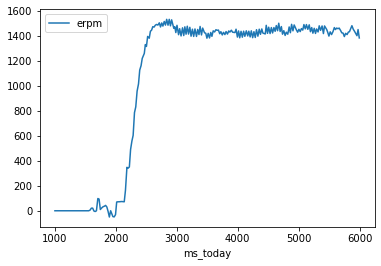

In [177]:
set_1 = row_subset(data_erpm, 1000, 6000)

In [183]:
for i, val in enumerate(set_1['erpm']>0):
    if abs(val):
        print(f"index: {i}")
        print(f"RPM: {set_1['erpm'][i]}")
        print(f"Time, ms: {set_1['ms_today'][i]}")
        break

index: 27
RPM: 5
Time, ms: 1580


/tmp/ipykernel_36608/3470337457.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = df[df['ms_today'] <time_upper_bound][df['ms_today']>time_lower_bound]


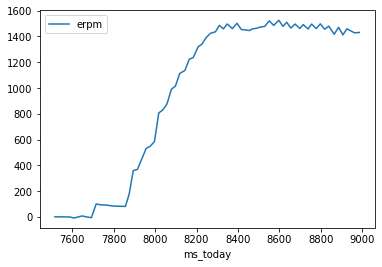

In [164]:
set_2 = row_subset(data_erpm, 7500, 9000)

In [165]:
set_3 = row_subset(data_erpm, 1000, 6000)

In [ ]:
set_4 = row_subset(data_erpm, 1000, 6000)

164
54


In [ ]:
# Generate a dataset of a simulated dynamical system
x_train, x_valid, y_train, y_valid = get_siso_data(
    n=1000,
    colored_noise=False,
    sigma=0.001,
    train_percentage=80
)